In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [174]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [175]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [176]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### EDA

In [177]:
#Cleaning target variable
df['classification'] = df['classification'].apply(lambda x: x.replace('\t','') if '\t' in x else x)

In [178]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

#### Target doesn't seem to be imbalanced by much ratio so it looks fine to go ahead

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [180]:
#Identifying missing value percentage for each columns

(df.isnull().sum()/len(df))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [181]:
df.drop(columns=['id'], inplace=True)

In [182]:
# Strip any leading/trailing whitespace from the column
df['pcv'] = df['pcv'].astype(str).str.strip()
df['pcv'] = df['pcv'].replace(r'^\t\d+$', np.nan, regex=True)
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')

In [184]:
df['wc'] = df['wc'].astype(str).str.strip()
df['wc'] = df['wc'].replace(r'^\t\d+$', np.nan, regex=True)
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')

In [185]:
df['rc'] = df['rc'].astype(str).str.strip()
df['rc'] = df['rc'].replace(r'^\t\d+$', np.nan, regex=True)
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [186]:
df['dm'] = df['dm'].astype(str).str.strip()
df['dm'] = df['dm'].replace(r'^\t\d+$', np.nan, regex=True)
df['dm'] = df['dm'].replace('nan', np.nan)
df['dm'] = df['dm'].astype(object)

In [187]:
df['cad'] = df['cad'].astype(str).str.strip()
df['cad'] = df['cad'].replace(r'^\t\d+$', np.nan, regex=True)
df['cad'] = df['cad'].replace('nan', np.nan)
df['cad'] = df['cad'].astype(object)

In [188]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.drop(columns=['classification']).select_dtypes(include=['object']).columns

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['classification']),df[['classification']],test_size=0.2, random_state=20)

In [191]:
#Identifying missing value percentage for each columns for train data

(x_train.isnull().sum()/len(x_train))*100

age       2.5000
bp        3.1250
sg       10.0000
al       10.3125
su       10.9375
rbc      36.8750
pc       14.0625
pcc       0.9375
ba        0.9375
bgr      12.1875
bu        5.3125
sc        4.6875
sod      20.9375
pot      21.2500
hemo     11.5625
pcv      16.2500
wc       25.6250
rc       32.1875
htn       0.3125
dm        0.3125
cad       0.3125
appet     0.3125
pe        0.3125
ane       0.3125
dtype: float64

In [192]:
# Filling missing values for numerical features for the train dataset
for i in numeric_features:
    median_value_train = x_train[i].median()
    median_value_test = x_test[i].median()
    x_train[i]=x_train[i].fillna(median_value_train)
    x_test[i]=x_test[i].fillna(median_value_test)

In [193]:
# Filling missing values for categorical features for the train dataset
for i in categorical_features:
    mode_train = x_train[i].mode()[0]
    mode_test = x_test[i].mode()[0]
    x_train[i] = x_train[i].fillna(mode_train)
    x_test[i] = x_test[i].fillna(mode_test)

In [194]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 94 to 355
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     320 non-null    float64
 1   bp      320 non-null    float64
 2   sg      320 non-null    float64
 3   al      320 non-null    float64
 4   su      320 non-null    float64
 5   rbc     320 non-null    object 
 6   pc      320 non-null    object 
 7   pcc     320 non-null    object 
 8   ba      320 non-null    object 
 9   bgr     320 non-null    float64
 10  bu      320 non-null    float64
 11  sc      320 non-null    float64
 12  sod     320 non-null    float64
 13  pot     320 non-null    float64
 14  hemo    320 non-null    float64
 15  pcv     320 non-null    float64
 16  wc      320 non-null    float64
 17  rc      320 non-null    float64
 18  htn     320 non-null    object 
 19  dm      320 non-null    object 
 20  cad     320 non-null    object 
 21  appet   320 non-null    object 
 22  pe    

In [195]:
for i in categorical_features:
    print(x_train[[i]].nunique())

rbc    2
dtype: int64
pc    2
dtype: int64
pcc    2
dtype: int64
ba    2
dtype: int64
htn    2
dtype: int64
dm    2
dtype: int64
cad    2
dtype: int64
appet    2
dtype: int64
pe    2
dtype: int64
ane    2
dtype: int64


In [196]:
mapping_dict = {'normal': 0, 'abnormal': 1}

# Use the .map() method to apply the mapping to the 'pc' column
x_train['pc'] = x_train['pc'].map(mapping_dict)
x_train['rbc'] = x_train['rbc'].map(mapping_dict)

x_test['pc'] = x_test['pc'].map(mapping_dict)
x_test['rbc'] = x_test['rbc'].map(mapping_dict)

In [197]:
mapping_dict = {'notpresent':0, 'present':1}

# Use the .map() method to apply the mapping to the 'pc' column
x_train['pcc'] = x_train['pcc'].map(mapping_dict)
x_train['ba'] = x_train['ba'].map(mapping_dict)


x_test['pcc'] = x_test['pcc'].map(mapping_dict)
x_test['ba'] = x_test['ba'].map(mapping_dict)


In [198]:
mapping_dict ={'no':0, 'yes':1}
x_train['pe'] = x_train['pe'].map(mapping_dict)
x_train['ane'] = x_train['ane'].map(mapping_dict)
x_train['cad'] = x_train['cad'].map(mapping_dict)
x_train['dm'] = x_train['dm'].map(mapping_dict)
x_train['htn'] = x_train['htn'].map(mapping_dict)

x_test['pe'] = x_test['pe'].map(mapping_dict)
x_test['ane'] = x_test['ane'].map(mapping_dict)
x_test['cad'] = x_test['cad'].map(mapping_dict)
x_test['dm'] = x_test['dm'].map(mapping_dict)
x_test['htn'] = x_test['htn'].map(mapping_dict)

In [199]:
mapping_dict = {'notckd':0, 'ckd':1}
y_train['classification'] = y_train['classification'].map(mapping_dict)

y_test['classification'] = y_test['classification'].map(mapping_dict)

In [200]:
mapping_dict = {'poor':0,'good':1}
x_train['appet'] = x_train['appet'].map(mapping_dict)

x_test['appet'] = x_test['appet'].map(mapping_dict)


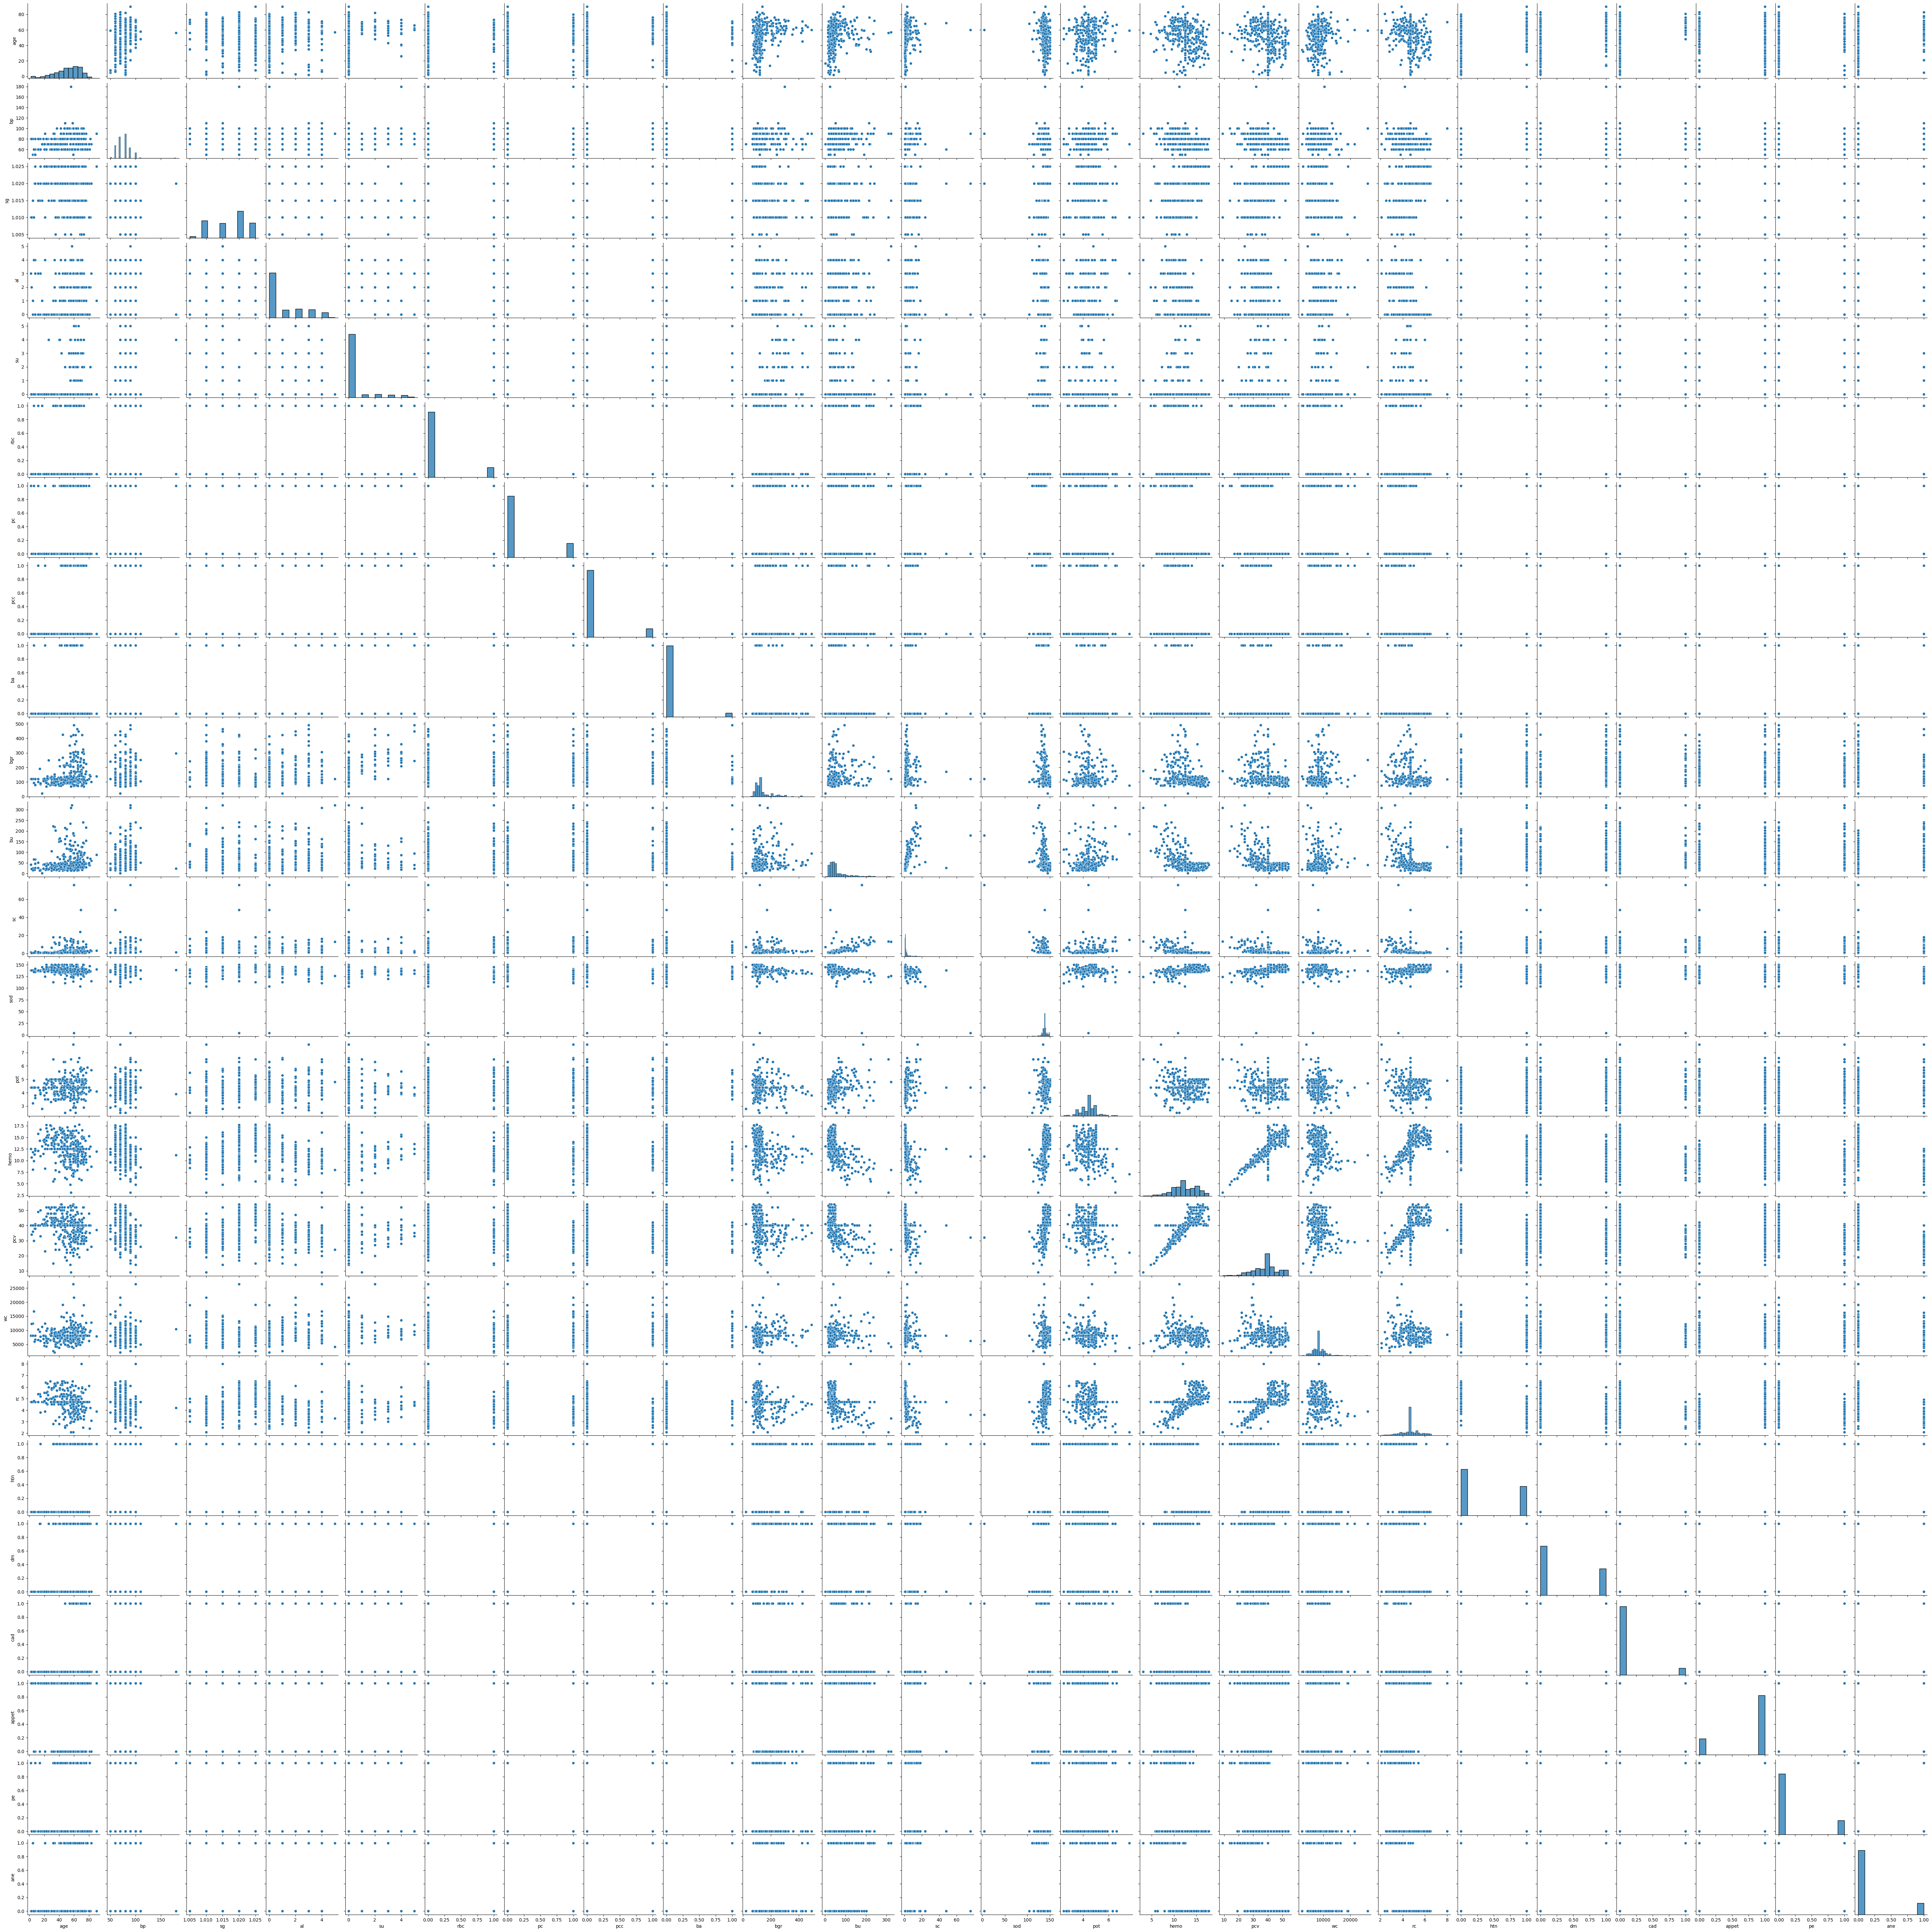

In [201]:
sns.pairplot(x_train)
plt.show()

### Since the pairplot shows that the relationship is not Linear between almost all the features, so, don't need to treat any outlier case, we also need to proceed ahead without any scaling of numerical features and can't use Regression algorithms

## Feature Selection

<Axes: >

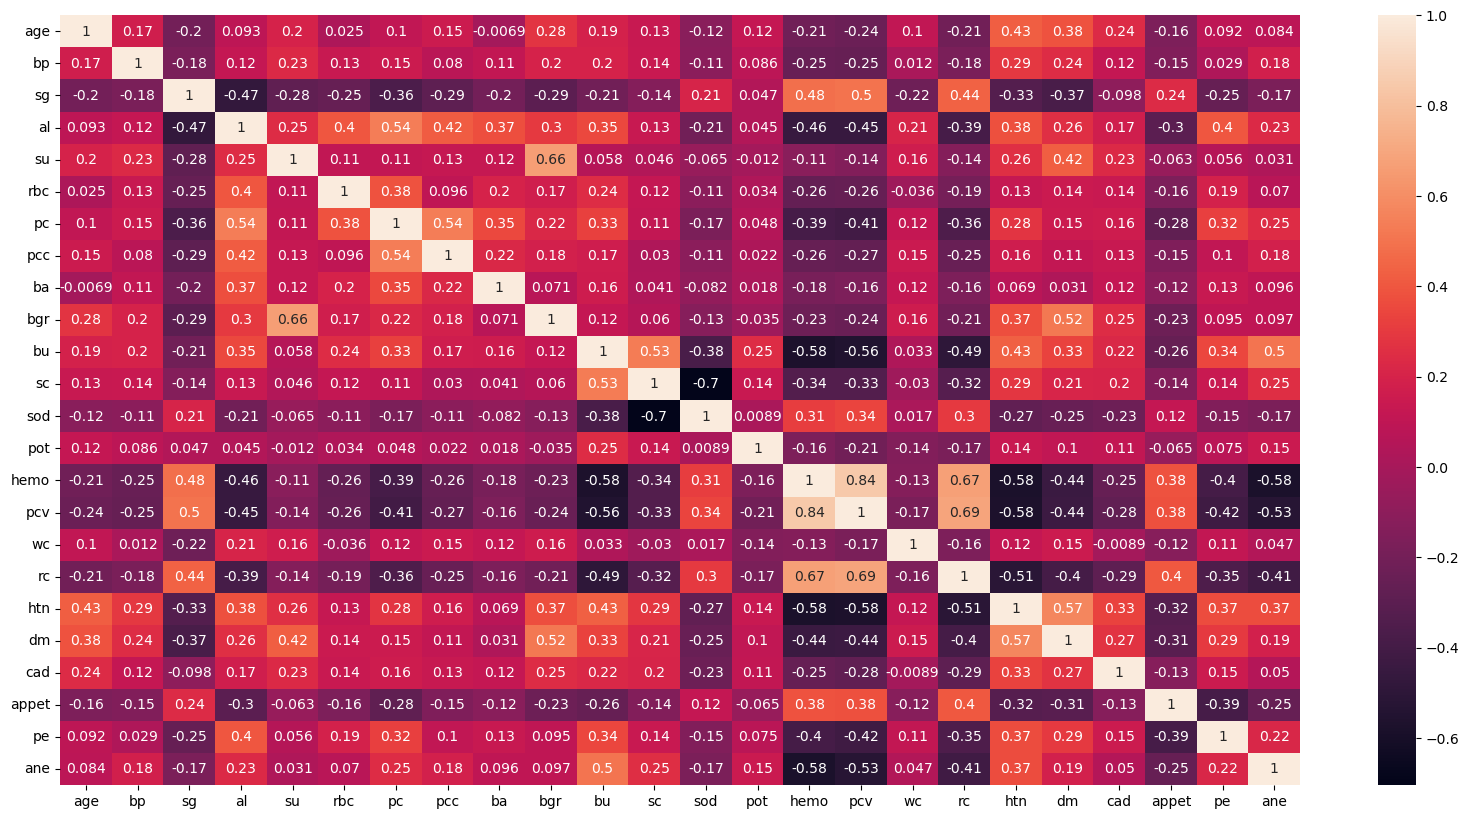

In [202]:
plt.figure(figsize=(20, 10))
sns.heatmap(x_train.corr(),annot=True)

#### Based on the heatmap it can be seen that hemo & pcv have strong correlation but we will automate it in the next step

In [203]:
def remove_highly_correlated_features(df, threshold=0.8):
    """
    Removes highly correlated features from a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The correlation threshold. Features with an
                           absolute correlation above this value will be
                           considered for removal.

    Returns:
        pd.DataFrame: A new DataFrame with highly correlated features removed.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a set to store features to be dropped
    features_to_drop = set()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the correlation is above the threshold
            if corr_matrix.iloc[i, j] > threshold:
                # Get the names of the two correlated features
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]

                # Decide which one to drop. A common strategy is to drop one
                # of the two features. For simplicity, we drop the second one.
                # In more advanced cases, you might choose based on a metric
                # like feature importance.
                if colname_i not in features_to_drop:
                    features_to_drop.add(colname_i)

    # Drop the identified features from the DataFrame
    df_reduced = df.drop(columns=list(features_to_drop))

    return df_reduced

In [204]:
x_train = remove_highly_correlated_features(x_train)

In [205]:
x_train.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane'],
      dtype='object')

In [206]:
x_test = x_test[[*x_train.columns]]

In [207]:
x_test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane'],
      dtype='object')

## ML Algorithms

### Decision Tree Classifier

In [208]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [209]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [210]:
ytrainpred = dt.predict(x_train)

In [211]:
ytestpred = dt.predict(x_test)

In [212]:
from sklearn.metrics import classification_report

In [213]:
print(classification_report(ytrainpred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       204

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [214]:
from sklearn.metrics import log_loss, brier_score_loss

In [215]:
y_pred_proba = dt.predict_proba(x_test)[:, 1]

# Compute Log-loss
logloss_value = log_loss(y_test, y_pred_proba)

# Compute Brier score
brier_value = brier_score_loss(y_test, y_pred_proba)

print("Log-loss:", logloss_value)
print("Brier score:", brier_value)

Log-loss: 2.252728336819822
Brier score: 0.0625


### Stacking Algorithm - Latency is not that critical

In [216]:
# Stacking approach

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Define base models (level-0)
base_models = [
    ('dt', DecisionTreeClassifier(class_weight='balanced',random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('svc', SVC(class_weight='balanced', probability=True, random_state=42))  # probability=True required for stacking
]

# Step 2: Define meta-model (level-1)
meta_model = LogisticRegression()

# Step 3: Create Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # cross-validation for level-1 training
)

# Step 4: Fit on training data
stacking_model.fit(x_train, y_train)

# Step 5: Predict
ytrainpred_stack = stacking_model.predict(x_train)
ytestpred_stack = stacking_model.predict(x_test)

# Step 6: Evaluate
print("Train Report:\n", classification_report(y_train, ytrainpred_stack))
print("Test Report:\n", classification_report(y_test, ytestpred_stack))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       204

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Test Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.93      0.97        46

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [217]:
y_pred_proba = stacking_model.predict_proba(x_test)[:, 1]

# Compute Log-loss
logloss_value = log_loss(y_test, y_pred_proba)

# Compute Brier score
brier_value = brier_score_loss(y_test, y_pred_proba)

print("Log-loss:", logloss_value)
print("Brier score:", brier_value)

Log-loss: 0.0854770593868459
Brier score: 0.021630428097825595


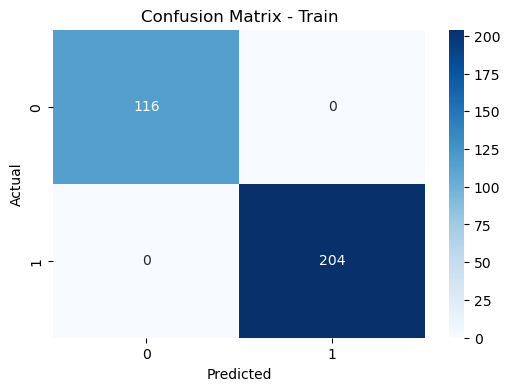

In [218]:
cm_train = confusion_matrix(y_train, ytrainpred_stack)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

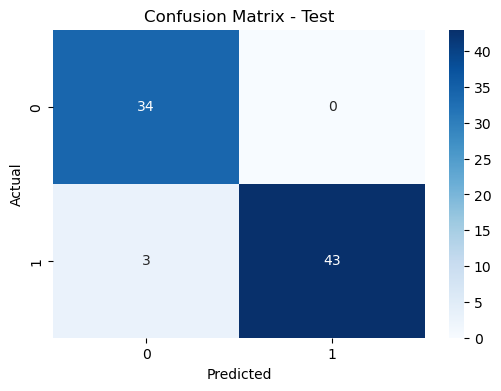

In [219]:
cm_test = confusion_matrix(y_test, ytestpred_stack)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### XGBoost Algorithm

In [220]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
)

In [221]:
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:12:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [222]:
ytrainpred_xg = model.predict(x_train)
ytestpred_xg = model.predict(x_test)

In [223]:
print("Train Report:\n", classification_report(y_train, ytrainpred_xg))
print("Test Report:\n", classification_report(y_test, ytestpred_xg))

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       204

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Test Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       1.00      0.89      0.94        46

    accuracy                           0.94        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



In [224]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Compute Log-loss
logloss_value = log_loss(y_test, y_pred_proba)

# Compute Brier score
brier_value = brier_score_loss(y_test, y_pred_proba)

print("Log-loss:", logloss_value)
print("Brier score:", brier_value)

Log-loss: 0.1434691325504597
Brier score: 0.040109757203122


In [225]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

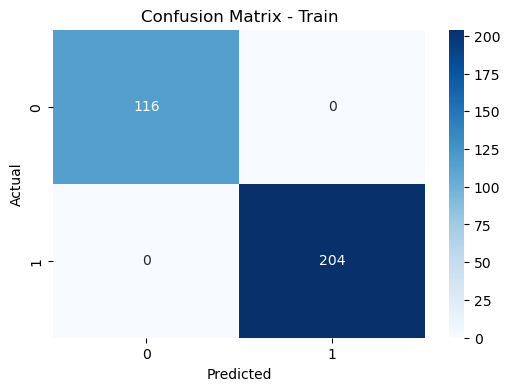

In [226]:
cm_train = confusion_matrix(y_train, ytrainpred_xg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

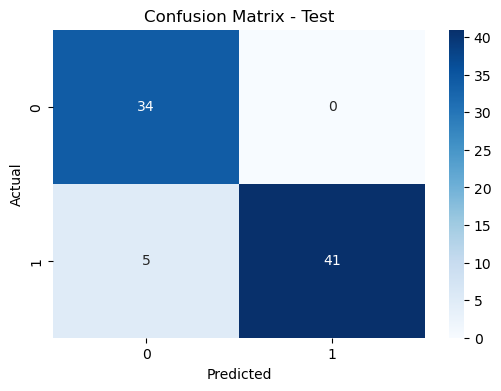

In [227]:
cm_test = confusion_matrix(y_test, ytestpred_xg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### As per the observation, log-loss, Brier score, and FP are better when using the stacking algorithm compared to XgBoost, so we can go ahead with the Stacking algorithm for now

### Still, before/after deploying it in <b> production </b> check on below points:
#### <b>a</b>. Test on more samples
#### <b>b</b>. Try more algorithms
#### <b>c</b>. Continuous monitoring of the model for any data distribution shift
#### <b>d</b>. Hyperparameters tuning
#### <b>e</b>. Adjusting weights for imbalanced classes(if any)